## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd 
import datetime

In [2]:
df_flights = pd.read_csv("flights_r", sep=",")
df_flights.head(10)
df_flights.isnull().sum()
new_d_w = df_flights.drop(['mkt_unique_carrier', 'branded_code_share', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'cancellation_code', 'dup', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)

In [3]:
new_d_w_nn = new_d_w.dropna(axis=0) 
new_d_w_nn.shape
new_d_w_nn['dep_time']

0        654.0
1       1855.0
2       2001.0
3        654.0
4       1501.0
         ...  
9995    1408.0
9996    2134.0
9997    1548.0
9998    1439.0
9999    1735.0
Name: dep_time, Length: 9769, dtype: float64

In [4]:
new_d_w_nn.isnull().sum()

fl_date                0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [5]:
len(new_d_w_nn['arr_delay'])

9769

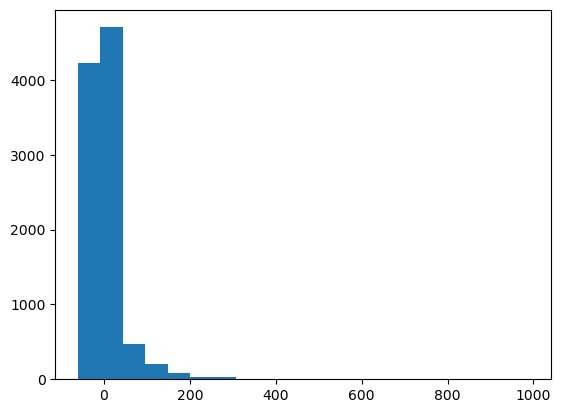

In [6]:
import matplotlib.pyplot as plt

x = new_d_w_nn['arr_delay']
plt.hist(x, bins = 20)
plt.show()

In [7]:
new_d_w_nn['arr_delay']
new_d_w_nn[new_d_w_nn.arr_delay > 300]
new_d_w_nn_out = new_d_w_nn[new_d_w_nn['arr_delay']<= 300] 
new_d_w_nn_out.shape

(9739, 25)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


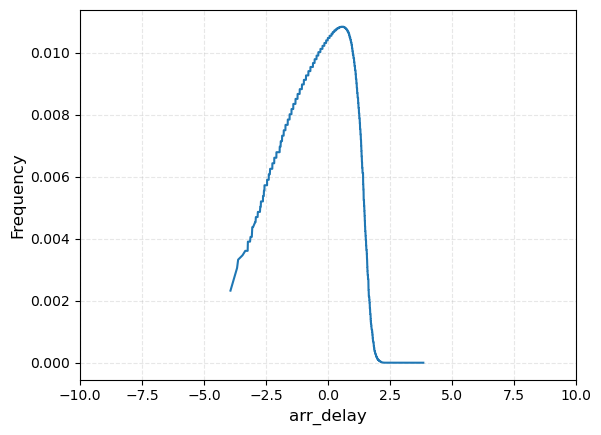

In [8]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Generating data frame
x = np.random.normal(0, 1, 9739)
source = {"quantity": ["1"]*9739, "arr_delay": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(new_d_w_nn_out["arr_delay"])
df_std = np.std(new_d_w_nn_out["arr_delay"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(new_d_w_nn_out["arr_delay"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["arr_delay"].sort_values(), pdf)
plt.xlim([-10,10])  
plt.xlabel("arr_delay", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [112]:
import datetime as dt
from datetime import datetime, date, time, timedelta, timezone
new_d_w_nn['fl_date'] = pd.to_datetime(new_d_w_nn['fl_date'])
new_d_w_nn['month'] = new_d_w_nn['fl_date'].dt.month

new_d_w_nn['year'] = pd.DatetimeIndex(new_d_w_nn['fl_date']).year
df_delay=new_d_w_nn[new_d_w_nn.arr_delay > 0]

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/860050916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['fl_date'] = pd.to_datetime(new_d_w_nn['fl_date'])
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/860050916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['month'] = new_d_w_nn['fl_date'].dt.month
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/860050916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [113]:
df_delay['month'].value_counts()

7     338
6     335
8     333
12    287
5     278
10    277
4     263
2     262
11    248
3     247
1     241
9     232
Name: month, dtype: int64

In [115]:
df_delay.groupby(['month', 'year'])['arr_delay'].mean()

month  year
1      2018    39.333333
       2019    39.911765
2      2018    43.748031
       2019    48.770370
3      2018    26.342105
       2019    36.872180
4      2018    34.037594
       2019    52.030769
5      2018    41.028986
       2019    39.535714
6      2018    46.229814
       2019    45.649425
7      2018    49.302326
       2019    41.018072
8      2018    41.814607
       2019    44.593548
9      2018    33.456140
       2019    34.305085
10     2018    38.120567
       2019    32.470588
11     2018    34.577778
       2019    28.398230
12     2018    33.258065
       2019    42.411043
Name: arr_delay, dtype: float64

In [116]:
df_delay.groupby('month')['arr_delay'].mean()

month
1     39.659751
2     46.335878
3     32.012146
4     42.931559
5     40.276978
6     45.928358
7     45.233728
8     43.108108
9     33.887931
10    35.346570
11    31.762097
12    38.456446
Name: arr_delay, dtype: float64

In [117]:
df_delay.groupby('month')['arr_delay'].median()

month
1     16.0
2     19.0
3     14.0
4     21.0
5     21.0
6     20.0
7     18.0
8     18.0
9     17.5
10    14.0
11    14.0
12    18.0
Name: arr_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [15]:
new_d_w_nn['crs_dep_time_h']=new_d_w_nn['crs_dep_time']// 100

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/1851842913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d_w_nn['crs_dep_time_h']=new_d_w_nn['crs_dep_time']// 100


In [16]:
new_d_w_nn['crs_dep_time_h']

0        7
1       19
2       19
3        7
4       15
        ..
9995    12
9996    21
9997    15
9998    14
9999    16
Name: crs_dep_time_h, Length: 9769, dtype: int64

In [17]:
# new_d_w_nn.groupby('crs_dep_time_h', sort=True).count()['taxi_in'].hist(bins=5)
# from pandas import DataFrame
# x = new_d_w_nn['crs_dep_time']    
# y = new_d_w_nn['taxi_in']   
# df = DataFrame({'crs_dep_time':x, 'Taxi_in':y})
# grouped = df.groupby('crs_dep_time')

# df.groupby('crs_dep_time').hist()

In [18]:
taxi_in=new_d_w_nn[new_d_w_nn.taxi_in > 0]
time_days = taxi_in.groupby('crs_dep_time_h')['taxi_in'].count()

y = time_days.reset_index()
x = y.sort_values(by='crs_dep_time_h', ascending=False)

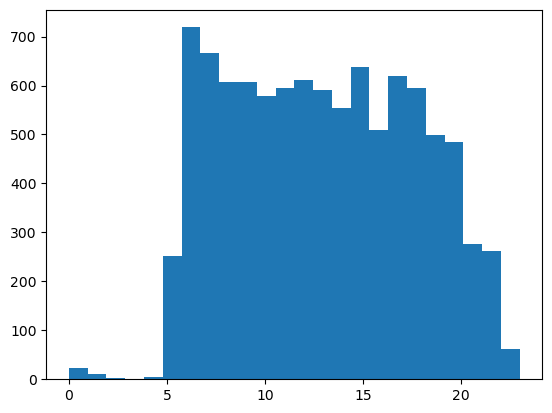

In [19]:
from matplotlib.pyplot import hist
hist(x.crs_dep_time_h, weights=x.taxi_in, bins=24 )
plt.show()

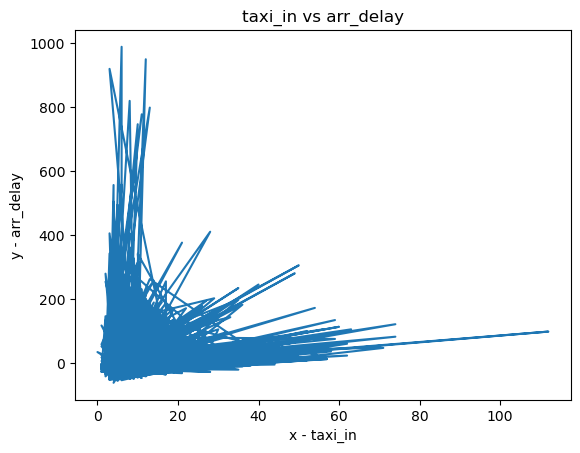

In [20]:
x = new_d_w_nn['taxi_in']
y = new_d_w_nn['arr_delay']

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - taxi_in')
# naming the y axis
plt.ylabel('y - arr_delay')
  
# giving a title to my graph
plt.title('taxi_in vs arr_delay')
  
# function to show the plot
plt.show()


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [21]:
df_delay=new_d_w_nn[new_d_w_nn.arr_delay > 0]
df_delay_departure = df_delay[df_delay.dep_delay > 0]
df_delay['arr_delay'].count()                          

3341

In [22]:
df_delay_departure['arr_delay'].count()
percentage =(3341/9739)*100
print(percentage)

34.30537016120751


yes, it can lower the dealy by better management by the airlines 

#### **Task 6**: How many states cover 50% of US air traffic? 

In [23]:
df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
df_delay[['des_city', 'states_d']] = df_delay['dest_city_name'].str.split(',', expand=True)

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/1793662396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/1793662396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[['ori_city', 'states_o']] = df_delay['origin_city_name'].str.split(',', expand=True)
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/179366

In [24]:
df_delay[['states_o']].groupby('states_o')['states_o'].count().nlargest(7)#sum()

states_o
 TX    386
 CA    366
 IL    252
 FL    240
 NY    187
 GA    168
 NC    158
Name: states_o, dtype: int64

In [25]:
x = df_delay[['states_d', 'arr_delay']].groupby('states_d')['arr_delay'].count().reset_index()

In [26]:
y = df_delay[['states_o', 'arr_delay']].groupby('states_o')['arr_delay'].count().reset_index()

In [27]:
df_t_d=pd.merge(y ,x , how='inner',left_on=['states_o'],right_on=['states_d'])

In [28]:
df_t_d['total'] = df_t_d['arr_delay_x']+df_t_d['arr_delay_y']
df_t_d['states']=df_t_d['states_o']
df_s_t =df_t_d.drop(['states_o', 'states_d'],axis=1)
df_s_t['total'].nlargest(7).sum()

3425

7 states covers the total 50% of the air traffics

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [29]:
x = new_d_w_nn['dep_delay']
y = new_d_w_nn['arr_delay']

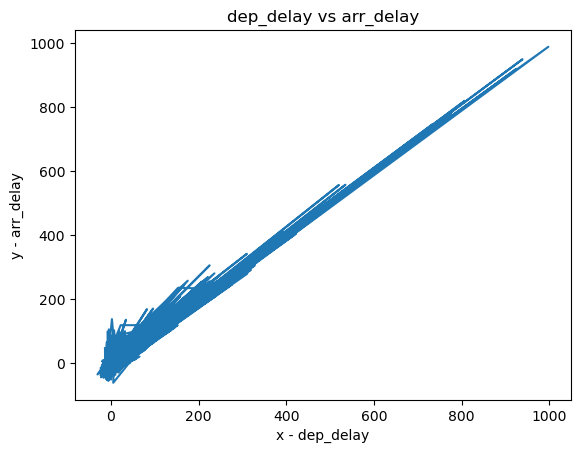

In [30]:
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - dep_delay')
# naming the y axis
plt.ylabel('y - arr_delay')
  
# giving a title to my graph
plt.title('dep_delay vs arr_delay')
  
# function to show the plot
plt.show()

No, when the flight is delay, the arrive delay similar time. So, won't affect plane faster.

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [31]:
# 'SHORT',: less than 3 hours; 'MEDIUM,: more than 3 hours less than 6 hours ; 'LONG': more than 6 hours 
new_d_w_nn.loc[new_d_w_nn['crs_elapsed_time'] <= 180.0, 'crs_elapsed_time'] = 0
new_d_w_nn.loc[((new_d_w_nn['crs_elapsed_time']>180.0) & (new_d_w_nn['crs_elapsed_time']<=360.0)), 'crs_elapsed_time'] = 1
new_d_w_nn.loc[new_d_w_nn['crs_elapsed_time'] > 360.0, 'crs_elapsed_time'] = 2

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

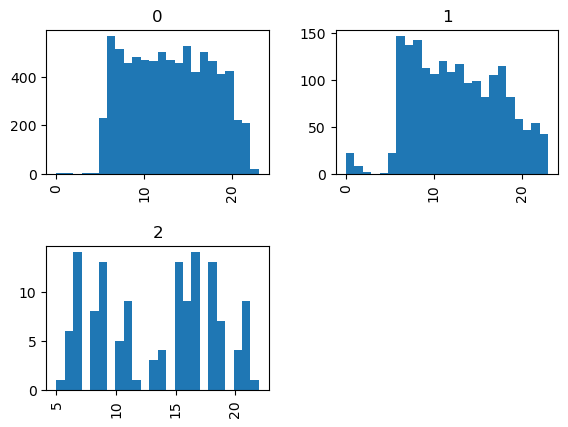

In [32]:
new_d_w_nn.hist(by='crs_elapsed_time', column='crs_dep_time_h', bins=24)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [33]:
new_d_w_nn.head(2)

,fl_date,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,month,year,crs_dep_time_h
0,2018-05-16,AS,3499,OO,DCA,"Washington, DC",DAL,"Dallas, TX",700,654.0,...,0,0,1,180.0,162.0,1,1184,5,2018,7
1,2019-05-17,DL,929,DL,SEA,"Seattle, WA",DEN,"Denver, CO",1903,1855.0,...,0,0,0,173.0,143.0,1,1024,5,2019,19


In [34]:
busy_ap = new_d_w_nn.groupby(['origin'])['flights'].count().nlargest(10) 
busy_ap

origin
ATL    501
ORD    456
DFW    366
DEN    340
LAX    316
CLT    313
IAH    250
SEA    248
LGA    239
DTW    226
Name: flights, dtype: int64

In [35]:
busy_ap.sum()

3255

In [36]:
df_delay_top=new_d_w_nn[new_d_w_nn.arr_delay > 0]
df_delay_top_c = df_delay_top.groupby(['origin'])['flights'].count().nlargest(15) 
total_delay_inbu = df_delay_top_c['ORD'] + df_delay_top_c['DEN']+df_delay_top_c['ATL']+df_delay_top_c['DFW']+df_delay_top_c['CLT']+df_delay_top_c['LAX']+df_delay_top_c['IAH']+df_delay_top_c['EWR']+df_delay_top_c['LGA']+df_delay_top_c['SFO']
total_delay_inbu

1176

In [37]:
df_delay_top.shape

(3341, 28)

In [38]:
cover = (5131/14964)*100
cover

34.28896017107726

In [39]:
df_p = pd.read_csv("passengers", sep=",")
df_p.head(10)
busy_ps = df_p.groupby(['origin'])['passengers'].count().nlargest(10) 
busy_ps 

origin
ORD    2121
ATL    1562
DEN    1383
IAH    1354
DTW    1340
MSP    1258
EWR    1030
CLT    1028
DFW     983
LAX     945
Name: passengers, dtype: int64

In [40]:
new_d_rs = new_d_w_nn.sample(n=5000)
new_d_pr = df_p.sample(n=5000)
df_cd=pd.merge(new_d_rs, new_d_pr, how='inner',left_on=['op_unique_carrier'],right_on=['unique_carrier'])

In [41]:
df_r = df_cd.groupby(['origin_x']).agg({'flights':'sum','passengers':'sum'})
df_r

,flights,passengers
origin_x,,
ABE,1369,79821
ABI,393,17409
ABQ,6013,738090
ABR,541,23976
ACK,274,22705
...,...,...
VEL,541,23976
VPS,2180,327948
XNA,1439,121395


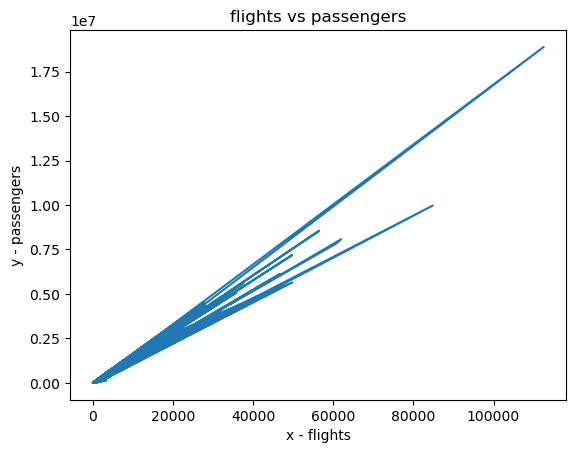

In [42]:
x = df_r['flights']
y = df_r['passengers']

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - flights')
# naming the y axis
plt.ylabel('y - passengers')
  
# giving a title to my graph
plt.title('flights vs passengers')
  
# function to show the plot
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [43]:
## average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
df_m = pd.read_csv("merge_df_fl_num.csv", sep=",")

In [44]:
df_m.head(4)

,Unnamed: 0,fl_date,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,carrier,origin,destination,distance,crs_dep_time,...,day_of_week,day_of_month,month,arr_delay,binary_delay,avg_month_payload_carrier,avg_month_psngr_carrier,avg_domest_cost_month_carrier,avg_domest_gallons_month_carrier,avg_dep_scheduled_monthly_airport
0,0,2018-06-19,1673,14771,14747,Alaska Airlines,"San Francisco, CA","Seattle, WA",679,1830,...,1,19,6,2,1,553850.0,3591.942804,80408619.0,43054527.0,16430
1,1,2019-06-21,1138,14771,14100,Alaska Airlines,"San Francisco, CA","Philadelphia, PA",2521,2205,...,4,21,6,-20,0,553850.0,3591.942804,80408619.0,43054527.0,16430
2,2,2018-06-03,1743,14771,14747,Alaska Airlines,"San Francisco, CA","Seattle, WA",679,800,...,6,3,6,2,1,553850.0,3591.942804,80408619.0,43054527.0,16430
3,3,2018-06-07,1924,14771,12892,Alaska Airlines,"San Francisco, CA","Los Angeles, CA",337,725,...,3,7,6,19,1,553850.0,3591.942804,80408619.0,43054527.0,16430


In [45]:
df_m_d=df_m[df_m.arr_delay > 0]

In [46]:
df_m_d.groupby(['carrier', 'month']).agg({'binary_delay': ['count']})

binary_delay
                             count
carrier         month             
Alaska Airlines 1                8
                2               10
                3               11
                4               12
                5               21
...                            ...
United Airlines 8               65
                9               54
                10              63
                11              50
                12              49

[128 rows x 1 columns]

In [47]:
print(y)

origin_x
ABE     79821
ABI     17409
ABQ    738090
ABR     23976
ACK     22705
        ...  
VEL     23976
VPS    327948
XNA    121395
YKM       831
YUM     23976
Name: passengers, Length: 286, dtype: int64


In [94]:
#Find out distance covered monthly by different air carriers

df_m_d.groupby(['carrier', 'month']).agg({'distance': ['sum']})


distance
                           sum
carrier         month         
Alaska Airlines 1        15998
                2        11368
                3        13318
                4        10577
                5        34450
...                        ...
United Airlines 8        80153
                9        65440
                10       81287
                11       61731
                12       61699

[128 rows x 1 columns]

In [92]:
#Find out number of passengers that were carried by different air carriers
y = df_m_d.groupby(['carrier', 'month', 'avg_month_psngr_carrier']).agg(binary_delay_sum= ('binary_delay', 'sum'))
y.columns = ['binary_delay_sum']

# reset index to get grouped columns back
y = y.reset_index()
y

,carrier,month,avg_month_psngr_carrier,binary_delay_sum
0,Alaska Airlines,1,2676.091873,8
1,Alaska Airlines,2,2665.266917,10
2,Alaska Airlines,3,3141.296429,11
3,Alaska Airlines,4,3366.586275,12
4,Alaska Airlines,5,3455.284644,21
...,...,...,...,...
123,United Airlines,8,3198.982744,65
124,United Airlines,9,3170.801305,54
125,United Airlines,10,3038.802387,63
126,United Airlines,11,3030.738417,50


In [93]:
z = y.groupby(['carrier']).agg(sum_month_psngr_carrier=('avg_month_psngr_carrier', 'sum'))
z

,sum_month_psngr_carrier
carrier,
Alaska Airlines,40588.411781
Allegiant Air,3025.928897
American Airlines,71307.939070
Delta Airlines,60358.936622
ExpressJet,7355.553515
Frontier Airlines,20231.925776
JetBlue Airways,62658.443177
Republic Airways,17552.163405
SkyWest Airlines,19637.950851


In [97]:
# Find out total fuel comsumption per air carrier.
x=df_m_d.groupby(['carrier', 'month', 'avg_domest_gallons_month_carrier']).agg(binary_delay_sum= ('binary_delay', 'sum'))
x.columns = ['binary_delay_sum']
x = x.reset_index()
x


,carrier,month,avg_domest_gallons_month_carrier,binary_delay_sum
0,Alaska Airlines,1,39098220.0,8
1,Alaska Airlines,2,35037875.0,10
2,Alaska Airlines,3,41707157.0,11
3,Alaska Airlines,4,40727280.0,12
4,Alaska Airlines,5,42011843.0,21
...,...,...,...,...
123,United Airlines,8,151878502.0,65
124,United Airlines,9,130827242.0,54
125,United Airlines,10,137243446.5,63
126,United Airlines,11,126211756.5,50


In [98]:
i = x.groupby(['carrier']).agg(sum_gallons_month_carrier=('avg_domest_gallons_month_carrier', 'sum'))
i

,sum_gallons_month_carrier
carrier,
Alaska Airlines,4.857202e+08
Allegiant Air,3.439781e+07
American Airlines,2.187013e+09
Delta Airlines,2.010129e+09
ExpressJet,4.760645e+05
Frontier Airlines,2.206433e+08
JetBlue Airways,6.399814e+08
Republic Airways,7.751216e+07
SkyWest Airlines,7.743416e+07


In [51]:
#Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays

In [52]:
df_m_d['a_f_pp_pk']= ((df_m_d['avg_domest_gallons_month_carrier']/df_m_d['avg_month_psngr_carrier'])/df_m_d['distance'])

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_9297/1585905843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m_d['a_f_pp_pk']= ((df_m_d['avg_domest_gallons_month_carrier']/df_m_d['avg_month_psngr_carrier'])/df_m_d['distance'])


In [100]:
T = df_m_d.groupby(['carrier', 'a_f_pp_pk']).agg(count_binary_delay = ('binary_delay','count' ))
T.columns = ['count_binary_delay']
T = T.reset_index()
T

,carrier,a_f_pp_pk,count_binary_delay
0,Alaska Airlines,3.758671,1
1,Alaska Airlines,3.974089,1
2,Alaska Airlines,4.131335,2
3,Alaska Airlines,4.141584,1
4,Alaska Airlines,4.157190,1
...,...,...,...
2623,United Airlines,218.384303,1
2624,United Airlines,223.948700,1
2625,United Airlines,225.818314,1
2626,United Airlines,237.385623,1


In [109]:
P = T.groupby(['carrier']).agg({'count_binary_delay':'sum', 'a_f_pp_pk':'mean'})
P.columns = ['count_binary_delay_sum', 'a_f_pp_pk_mean']
P = P.reset_index()
P

,carrier,count_binary_delay_sum,a_f_pp_pk_mean
0,Alaska Airlines,207,12.063464
1,Allegiant Air,2,41.148549
2,American Airlines,911,44.675726
3,Delta Airlines,727,45.990365
4,ExpressJet,11,0.246567
5,Frontier Airlines,89,13.660973
6,JetBlue Airways,212,15.330157
7,Republic Airways,157,11.174972
8,SkyWest Airlines,154,7.709734
9,Southwest Airlines,502,47.784067


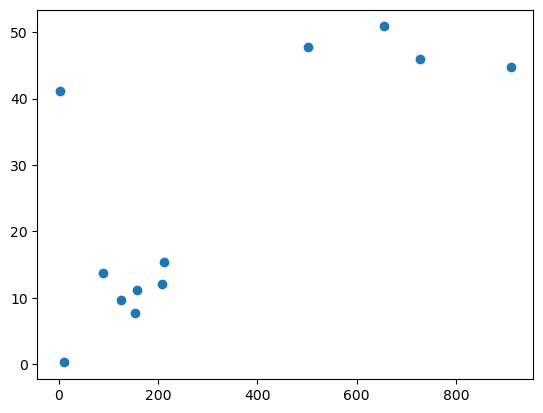

In [110]:
x = P['count_binary_delay_sum']
y = P['a_f_pp_pk_mean']

plt.scatter(x, y)
plt.show()

No, from above data, lots of the airline have larger fuel consumption with the less delay. So, the delay won't cause the higher fuel consumption. 